In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output


In [8]:
def show_img(img, bigger=False):
    if bigger:
        plt.figure(figsize=(15,15))
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [9]:
def mouse_handler(event, x, y, flags, data):
    if event == cv2.EVENT_LBUTTONDOWN:
        # 標記點位置
        cv2.circle(data['img'], (x,y), 3, (0,0,255), -1) 

        # 改變顯示 window 的內容
        cv2.imshow("Image", data['img'])
        
        # 顯示 (x,y) 並儲存到 list中
        print("get points: (x, y) = ({}, {})".format(x, y))
        data['points'].append((x,y))

def get_points(img):
    # 建立 data dict, img:存放圖片, points:存放點
    data = {}
    data['img'] = img.copy()
    data['points'] = []
    
    # 建立一個 window
    cv2.namedWindow("Image", 0)
    
    # 改變 window 成為適當圖片大小
    h, w, dim = img.shape
    print("img height, width: ({}, {})".format(h, w))
    cv2.resizeWindow("Image", w, h)
        
    # 顯示圖片在 window 中
    cv2.imshow('Image',img)
    
    # 利用滑鼠回傳值，資料皆保存於 data dict中
    cv2.setMouseCallback("Image", mouse_handler, data)
    
    # 等待關閉視窗，藉由 OpenCV 內建函數釋放資源
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # 回傳點 list
    return data['points']

origin image: 


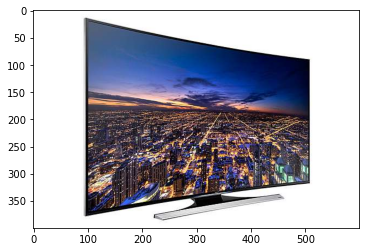

Click on four corners of bllboard and the press ENTER
img height, width: (400, 600)
get points: (x, y) = (102, 24)
get points: (x, y) = (497, 100)
get points: (x, y) = (408, 280)
get points: (x, y) = (129, 213)

points list:
[[102.  24.]
 [497. 100.]
 [408. 280.]
 [129. 213.]]


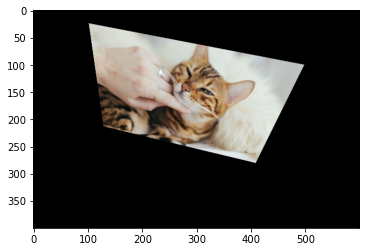

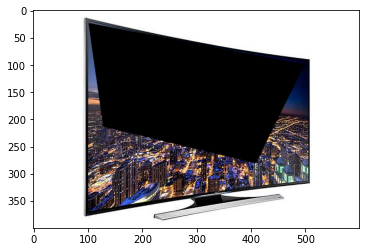

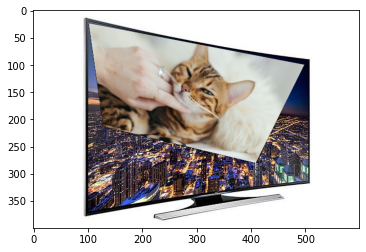

In [10]:
#Read the destination image
ori_img = cv2.imread("./testdata/tv.jpg")
print("origin image: ")
show_img(ori_img)

print("Click on four corners of bllboard and the press ENTER")
points = get_points(ori_img)

# 垂直堆疊點
points_2D = np.vstack(points).astype(float)

print("\npoints list:")
print(points_2D)

p_img = cv2.imread("./testdata/cat.jpg")
h, w, dim = p_img.shape
# 取得四个坐标
pst_src = np.array(
    [
        [0,0],
        [w-1,0],
        [w-1,h-1],
        [0,h-1]
     ],dtype=float
)


# 找到最佳映射矩陣
h, status = cv2.findHomography(pst_src, points_2D)
# print(h)

# 透視投影 (建立變形後的圖)
im_temp = cv2.warpPerspective(p_img, h, (ori_img.shape[1], ori_img.shape[0]))
show_img(im_temp)

# 填充多邊形 - 黑色 (該區域全為0)，等同於覆蓋上 mask
cv2.fillConvexPoly(ori_img, points_2D.astype(int), 0, 16)
show_img(ori_img)

#add wraped source image to destination image
ori_img = cv2.add(ori_img, im_temp)
show_img(ori_img)

# Reference

https://zhuanlan.zhihu.com/p/143035374

https://kknews.cc/code/3oqxejy.html

https://blog.csdn.net/fanjiule/article/details/81606596

https://blog.csdn.net/yefcion/article/details/79435591

https://blog.csdn.net/fengyeer20120/article/details/87798638



